In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# for simplicity we use our own basic implementation
# dataMat is assumed to be matrix of shape (nSamples,dimSample)
def PCA(dataMat,keep=None,centered=False):
    nSamples,dim=dataMat.shape
    # centerted True, then data is already centered
    if not centered:
        mean=np.mean(dataMat,axis=0)
        dataMat=dataMat.copy()
        dataMat=dataMat-mean
    if dim<nSamples:
        if keep is None:
            keep=dim
        A=dataMat.transpose().dot(dataMat)/nSamples
        eigData=np.linalg.eigh(A)
        eigval=(eigData[0][-keep::])[::-1]
        eigvec=((eigData[1][:,-keep::]).transpose())[::-1]
    else:
        if keep is None:
            keep=nSamples
        A=dataMat.dot(dataMat.transpose())/nSamples
        eigData=np.linalg.eigh(A)
        eigval=(eigData[0][-keep::])[::-1]
        eigvec=((eigData[1][:,-keep::]).transpose())[::-1]

        eigvec=np.einsum(eigvec,[0,1],dataMat,[1,2],[0,2])
        # renormalize
        normList=np.linalg.norm(eigvec,axis=1)
        eigvec=np.einsum(eigvec,[0,1],1/normList,[0],[0,1])
    if not centered:
        return mean,eigval,eigvec
    else:
        return eigval,eigvec

In [12]:
file = np.load("points.npz")
data = file['data']
hist_vectors = []
for d in data:
    counts, vals = np.histogram(d, bins=50, range=[-5,5])
    hist_vectors.append(counts)
hist_vectors = np.array(hist_vectors)
print(hist_vectors.shape)
mean, eigval, eigvec = PCA(hist_vectors)

(100, 50)


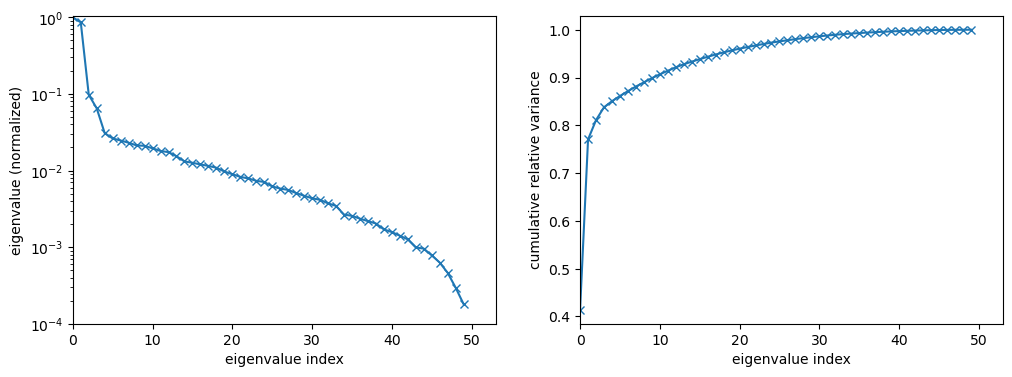

In [13]:
fig=plt.figure(figsize=(12,4))
axs=fig.subplots(1,2)

ax=axs[0]
ax.plot(eigval/eigval[0],marker="x")
ax.set_yscale("log")
ax.set_xlim([0,53])
ax.set_ylim([1E-4,1.05])
ax.set_xlabel("eigenvalue index")
ax.set_ylabel("eigenvalue (normalized)")

ax=axs[1]
cumdat=np.cumsum(eigval)
cumdat/=cumdat[-1]
ax.plot(cumdat,marker="x")
#ax.set_yscale("log")
ax.set_xlim([0,53])
#ax.set_ylim([1E-4,1.05])
ax.set_xlabel("eigenvalue index")
ax.set_ylabel("cumulative relative variance")


plt.show()

We can see, that just two of the eigenvalues can characterize a lot of the data. So we can try to reduce to just two dimensions

In [14]:
data_centered=hist_vectors-mean
coefs=data_centered@eigvec[:5,:].T
coefs[:5,:]

array([[-129.2686305 ,   42.55341809,   32.42133466,   18.23469235,
          -8.81740211],
       [-105.17948487,   65.42004836,   34.20780957,    2.09314609,
         -18.27077541],
       [ -74.96312347,   86.97943813,   24.35504363,  -17.6508863 ,
          -0.9076439 ],
       [ -51.23384726,   93.20799627,   18.65856599,  -25.66512782,
         -17.0741896 ],
       [  -6.63955338,  104.42251936,   -0.27795663,  -35.24022469,
          -2.32012872]])

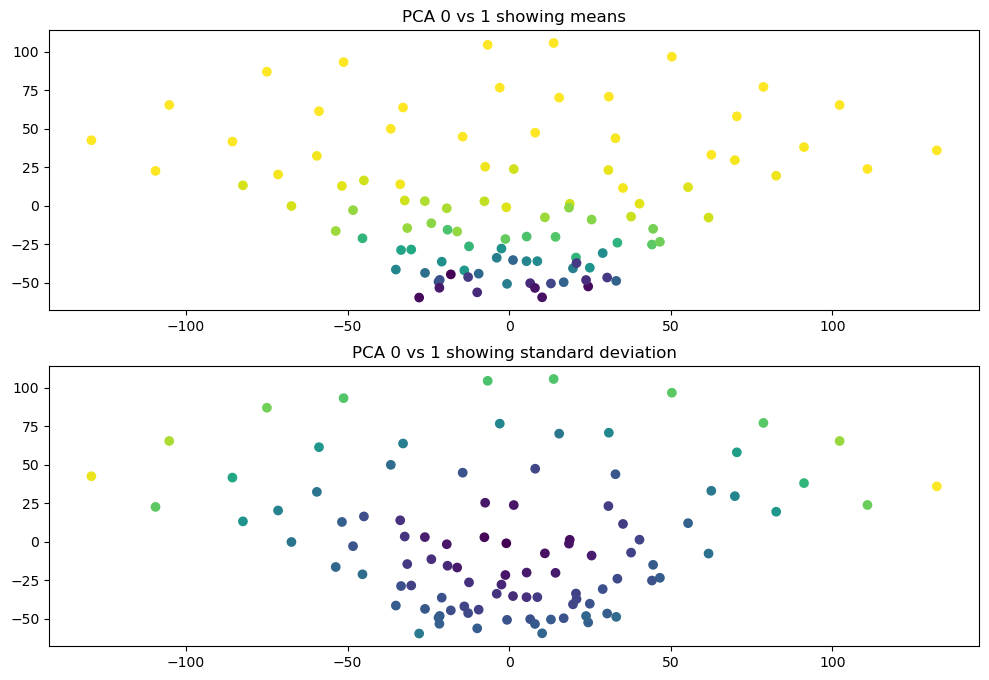

In [15]:
fig=plt.figure(figsize=(12,8))
axs=fig.subplots(2)
labels = list(range(100))

means = data_centered.mean(axis=1)
stds  = data_centered.std(axis=1)

ax=axs[0]
ax.set_title("PCA 0 vs 1 showing means")
ax.scatter(coefs[:,0], coefs[:,1], c=means)
ax=axs[1]
ax.set_title("PCA 0 vs 1 showing standard deviation")
ax.scatter(coefs[:,0], coefs[:,1], c=stds)
plt.show()

In [19]:
%matplotlib widget

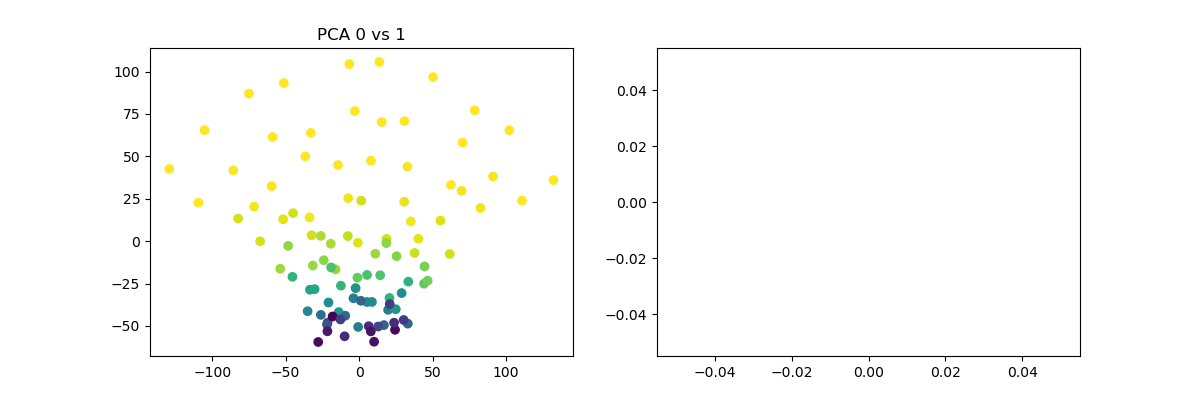

In [23]:
fig=plt.figure(figsize=(12,4))
axs=fig.subplots(1,2)

ax0=axs[0]
ax0.set_title("PCA 0 vs 1")
pltobj=ax0.scatter(coefs[:,0], coefs[:,1], c=means)

ax1=axs[1]
vmax=np.max(data)
stairs=ax1.stairs([])

def onmouse(event):
    cont, details = pltobj.contains(event)
    if cont:
        ind=details["ind"][0]
        #ind=np.random.choice(details["ind"],size=1)[0]
        img=data[ind]
        stairs.set_data([])

cid = fig.canvas.mpl_connect('button_press_event', onmouse)
plt.show()

In [16]:
%matplotlib inline
plt.close()